# Preloading

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ast import literal_eval
from dateutil.parser import parse


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [19]:
def join_month_data(data_folder, months):
    ''' 
    Pastes my monthly datasets together into a single DataFrame.
    '''
    csv_path = f'{data_folder}/{months[0]}_2018_data.csv'
    joined_df = pd.read_csv(csv_path)
        
    if len(months) > 1:
        for month in months[1:]:
            csv_path = f'{data_folder}/{month}_2018_data.csv'
            joined_df = pd.concat([joined_df, pd.read_csv(csv_path)], axis=0, ignore_index=True)
        return joined_df
            
    else:
        return joined_df

def count_words(a_string):
    """
    Counts number of words in a string.
    """
    return len(a_string.split())
    
def count_items(a_list):
    """
    Counts number of items in a list.
    """
    if a_list == 'None':
        return 0
    elif a_list is None:
        return 0
    else:
        return len(a_list)

def count_list_words(text_list):
    if text_list is None:
        return np.nan
    elif len(text_list) < 1:
        return np.nan
    else:
        n_words = sum([count_words(t) for t in text_list])
        return n_words
    
def mean_words(text_list):
    if len(text_list) == 0:
        return 0
    else:
        mean_length = round(np.mean([count_words(p) for p in text_list]))
        return int(mean_length)
    
def to_dt(date_string):
    if date_string == 'skip':
        return 'skip'
    else:
        return parse(date_string)

def log(series):
    return np.log(series+1)

### Load data

In [20]:
# load up data
months = ['jan','feb','mar','apr','may','june','july','aug','sept','oct','nov','dec']
df = join_month_data('Data', months[:12])

print(df.shape)
df.head()

(14855, 22)


,title,subtitle,tags,author,h1_headers,h2_headers,paragraphs,blockquotes,bold_text,italic_text,n_figures,n_bullet_lists,n_numbered_lists,n_gists,n_code_chunks,n_vids,n_links,publication,read_time,n_responses,n_claps,date
0,AI and Machine Learning in Cyber Security,What Zen Teaches About Insights,"['Machine Learning', 'AI', 'Data Science', 'Cy...",Formulated.by,"['Zen and Cyber Security', 'AI in Cyber Securi...",None,['Zen monks have been using a tool called a ko...,['“Zen is like a man hanging by his teeth in a...,"['koan', 'context', 'expert knowledge', 'Upcom...",None,2.0,0.0,0.0,0.0,0.0,0.0,17.0,Towards Data Science,7.0,3,771,"Jan 1, 2018"
1,Redefining statistical significance: the stati...,Part two of a three part series,"['Data Science', 'Statistics', 'Bayesian Stati...",Richard D. Morey,None,['Do Bayes factors overstate the statistical e...,"['[Part one of this series is here]', 'At the ...",[],"['The purpose of significance testing.', 'The ...","['[Part one of this series is', 'here', ']', '...",8.0,1.0,4.0,0.0,0.0,0.0,23.0,None,22.0,7,78,"Jan 1, 2018"
2,I do not understand t-SNE — Part 1,or my quest to understand t-SNE,"['Machine Learning', 'Tsne', 'Data Science', '...",Ankit Goyal,['SNE - Explained (Cliché)'],"['Probability Function', 'Shannon Entropy', 'K...",['t-SNE (or t-distributed Stochastic Neighbor ...,['One missing piece of the puzzle is the choic...,"['Information entropy', 'inversely proportiona...","['Kullback Leibler divergence', 'Shannon Entro...",10.0,0.0,0.0,0.0,0.0,0.0,15.0,None,7.0,2,181,"Jan 1, 2018"
3,Statistical Analysis with Python: Pokémon,Editor Ishmael Njie,"['Data Science', 'Statistics', 'Pokemon', 'Mat...",DataRegressed Team,None,None,"['Why analyse Pokémon?', 'I wanted to start of...",[],"['2. Type Analysis', '3. Base Stat Analysis']",None,31.0,3.0,0.0,0.0,0.0,0.0,4.0,DataRegressed,6.0,0,111,"Jan 1, 2018"
4,สอนให้เครื่องจักรเข้าใจภาษามนุษย์ภายใน code 3 ...,None,"['NLP', 'Data Science', 'Machine Learning', 'P...",DumpDataSci,None,None,['หมายเหตุ: บทความนี้เน้นที่ความง่าย ในการทำ T...,"['pip install pythainlp', 'from pythainlp.sent...",['หมายเหตุ: บทความนี้เน้นที่ความง่าย ในการทำ T...,None,1.0,0.0,1.0,0.0,0.0,0.0,3.0,None,1.0,1,42,"Jan 1, 2018"


In [21]:
df.columns

Index(['title', 'subtitle', 'tags', 'author', 'h1_headers', 'h2_headers',
       'paragraphs', 'blockquotes', 'bold_text', 'italic_text', 'n_figures',
       'n_bullet_lists', 'n_numbered_lists', 'n_gists', 'n_code_chunks',
       'n_vids', 'n_links', 'publication', 'read_time', 'n_responses',
       'n_claps', 'date'],
      dtype='object')

In [22]:
df.describe()

,n_figures,n_bullet_lists,n_numbered_lists,n_gists,n_code_chunks,n_vids,n_links,read_time,n_responses,n_claps
count,14844.000000,14844.000000,14844.000000,14844.000000,14844.000000,14844.000000,14844.000000,14615.000000,14855.000000,14855.000000
mean,5.410806,1.035368,0.383320,0.131501,1.474131,0.065077,7.152789,5.062128,1.130932,220.717805
std,7.203965,2.520848,1.112935,1.251377,5.509316,0.393912,14.626002,3.613888,4.649419,1067.865890
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,0.000000,16.000000
75%,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,6.000000,1.000000,116.000000
max,143.000000,59.000000,51.000000,42.000000,246.000000,12.000000,1180.000000,60.000000,168.000000,50000.000000


# Cleaning

#### Drop `n_responses` column: can't tune this dial.

In [23]:
df.drop('n_responses', axis=1, inplace=True)

#### Dropping rows

In [24]:
# drop rows with na or nan 
na_rows = df.isna().any(axis=1)
df = df[~na_rows]

# drop rows with 'skip' for date
df = df[df['date'] != 'skip']

# drop duplicates
df = df.drop_duplicates(['title','author'])

df.shape

(14425, 21)

#### Convert list columns from string representations to actual lists

In [25]:
# convert list columns: string representations to actual lists
list_cols = ['tags','h1_headers', 'h2_headers', 'paragraphs', 'bold_text', 'italic_text', 'blockquotes']
df[list_cols] = df[list_cols].applymap(lambda x: literal_eval(x))

# drop rows without lists of tags
df = df[~df['tags'].isna()]

# Visualizing claps

Number of claps is highly skewed.

In [26]:
from scipy.stats import skew
skew(df['n_claps'])

19.740814131326825

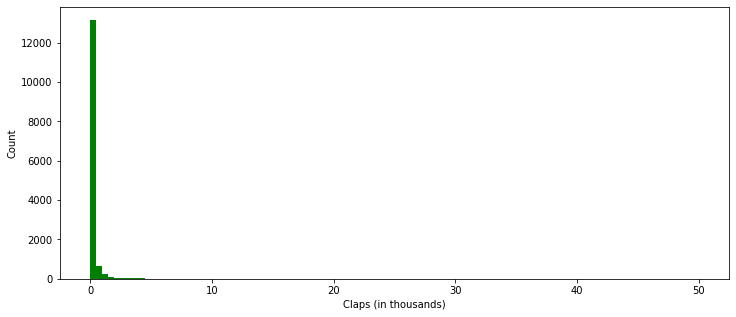

In [27]:
plt.figure(figsize=(12,5))
plt.hist(df['n_claps']/1000,color='green', bins = 100);
plt.ylabel('Count');
plt.xlabel('Claps (in thousands)');
plt.savefig('img/clap_dist.png', bbox_inches='tight');

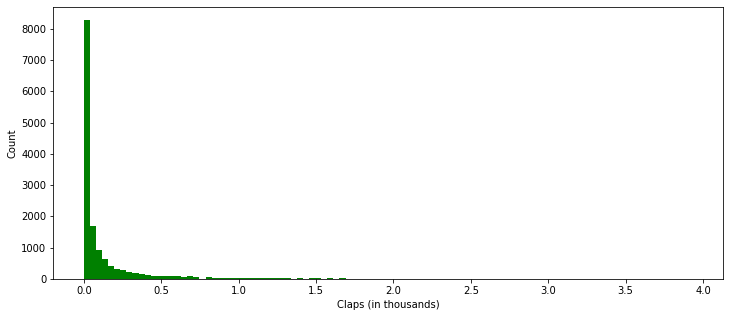

In [28]:
plt.figure(figsize=(12,5))
plt.hist(np.log(df['n_claps']/1000+1),color='green', bins = 100);
plt.ylabel('Count');
plt.xlabel('Claps (in thousands)');
plt.savefig('img/clap_dist.png', bbox_inches='tight');

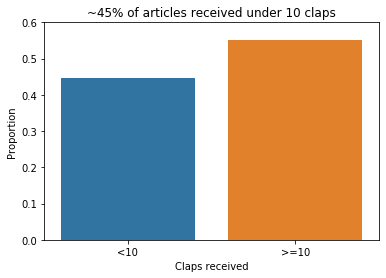

In [29]:
over_10_claps = [1 if claps > 10 else 0 for claps in df['n_claps']]
deciles = np.arange(0, len(df)+1, len(df)/10);

sns.countplot(over_10_claps)
plt.yticks(deciles[:7], np.round(deciles[:7]/len(df['n_claps']),1));
plt.xlabel('Claps received');
plt.ylabel('Proportion');
plt.title('~45% of articles received under 10 claps')
locs, labels = plt.xticks();
plt.xticks(locs, labels=['<10', '>=10']);

/Users/collindching/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


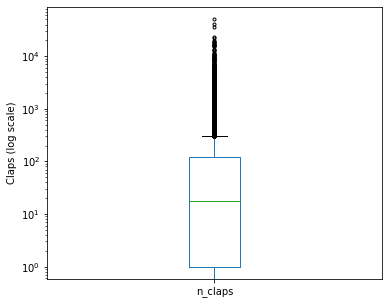

In [30]:
plt.figure(figsize=(6,5));
#plt.tick_params(axis=u'both', which=u'both',length=0)

df.boxplot(column='n_claps', sym='.');
plt.yscale('log');
plt.ylabel('Claps (log scale)');
plt.xticks(None)

ax = plt.axes()        
ax.grid(False, which='both')
plt.savefig('img/clap_boxplot.png', bbox_inches='tight');

In [31]:
df['n_claps'].describe()

count    14424.000000
mean       226.216237
std       1082.571020
min          0.000000
25%          1.000000
50%         18.000000
75%        121.000000
max      50000.000000
Name: n_claps, dtype: float64

In [32]:
from scipy.stats import iqr
121 + 1.5*iqr(df['n_claps'])

301.0

Suspected outliers are anything above 301 claps. I'd like to focus on any article that receives up to 1000 claps. 

In [33]:
df = df[df['n_claps'] < 1000]

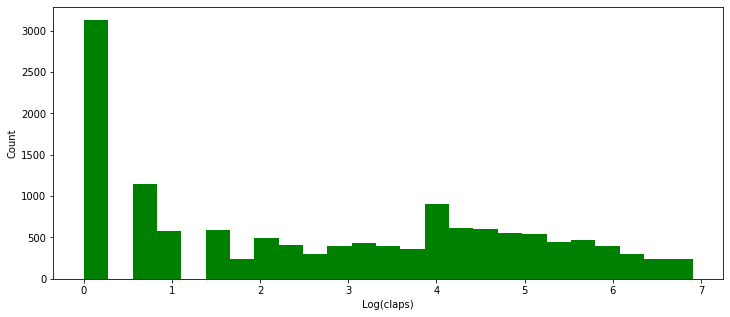

In [34]:
plt.figure(figsize=(12,5));
plt.hist(np.log(df['n_claps']+1), bins=25, color='green');
plt.ylabel('Count');
plt.xlabel('Log(claps)');
plt.savefig('img/log_clap_dist.png', bbox_inches='tight');

In [35]:
skew(df['n_claps'])

2.7488584835360244

In [36]:
skew(np.log(df['n_claps']+1))

0.12625155886255957

Log is probably as good as it will get. May want to downsample the 0 case.

# Create basic features

In [37]:
# word count
df['title_length'] = df['title'].map(count_words)
df['subtitle_length'] = df['subtitle'].map(count_words)

# count number of text attributes
df['n_tags'] = df['tags'].map(count_items)
df['n_h1_headers'] = df['h1_headers'].map(count_items)
df['n_h2_headers'] = df['h2_headers'].map(count_items)
df['n_paragraphs'] = df['paragraphs'].map(count_items)
df['n_bold_text'] = df['bold_text'].map(count_items)
df['n_italic_text'] = df['italic_text'].map(count_items)
df['n_blockquotes'] = df['blockquotes'].map(count_items)

# calculate number of pictures
df['n_pics'] = df['n_figures'] - df['n_gists'] - df['n_vids']
df = df.drop('n_figures', axis=1)

# length attributes
df['article_length'] = df['paragraphs'].map(count_list_words)
df['mean_paragraph_length'] = df['paragraphs'].map(mean_words)

# date features  
df['date'] = df['date'].map(to_dt)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek

# extract season from date
season_dict = {
    1: 'winter',
    2: 'winter',
    3: 'spring',
    4: 'spring',
    5: 'spring',
    6: 'summer',
    7: 'summer',
    8: 'summer',
    9: 'fall',
    10: 'fall',
    11: 'fall',
    12: 'winter'
}
df['season'] = df['month'].map(lambda x: season_dict[x])
df['winter'] = [1 if season=='winter' else 0 for season in df['season']]
df['summer'] = [1 if season=='summer' else 0 for season in df['season']]
df['spring'] = [1 if season=='spring' else 0 for season in df['season']]

In [38]:
# features
df.columns

Index(['title', 'subtitle', 'tags', 'author', 'h1_headers', 'h2_headers',
       'paragraphs', 'blockquotes', 'bold_text', 'italic_text',
       'n_bullet_lists', 'n_numbered_lists', 'n_gists', 'n_code_chunks',
       'n_vids', 'n_links', 'publication', 'read_time', 'n_claps', 'date',
       'title_length', 'subtitle_length', 'n_tags', 'n_h1_headers',
       'n_h2_headers', 'n_paragraphs', 'n_bold_text', 'n_italic_text',
       'n_blockquotes', 'n_pics', 'article_length', 'mean_paragraph_length',
       'year', 'month', 'day', 'day_of_week', 'season', 'winter', 'summer',
       'spring'],
      dtype='object')

# Split the data

Stratified train-test split, according to clap groupings

In [39]:
# how much to have in each category
print(f"Each group should be about {(len(df)/4)} rows.", end='\n\n')

# try to group observations into equally sized groups
print(pd.cut(df['n_claps'], [-1, 1, 30, 150, 50001], labels=['group 1','group 2','group 3','group 4']).value_counts())

# create group
df['clap_group'] = pd.cut(df['n_claps'], [-1, 1, 30, 150, 50001], labels=['group 1','group 2','group 3','group 4'])

Each group should be about 3446.25 rows.

group 1    4274
group 2    3630
group 3    3341
group 4    2540
Name: n_claps, dtype: int64


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['n_claps'], axis=1)
y = df['n_claps']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=4, stratify=df['clap_group'])

In [41]:
print('Clap distribution is better preserved.',
      X_train.clap_group.value_counts()/len(X_train),
      X_test.clap_group.value_counts()/len(X_test), sep='\n\n')

X_train = X_train.drop('clap_group', axis=1)
X_test = X_test.drop('clap_group', axis=1)

Clap distribution is better preserved.

group 1    0.310029
group 2    0.263330
group 3    0.242383
group 4    0.184258
Name: clap_group, dtype: float64

group 1    0.310120
group 2    0.263330
group 3    0.242292
group 4    0.184258
Name: clap_group, dtype: float64


### Plots

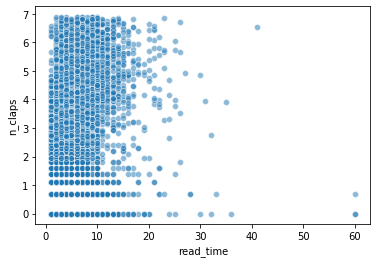

In [42]:
sns.scatterplot(X_train['read_time'], log(y_train), alpha=.5)

# Baseline model 

In [43]:
X_train.columns

Index(['title', 'subtitle', 'tags', 'author', 'h1_headers', 'h2_headers',
       'paragraphs', 'blockquotes', 'bold_text', 'italic_text',
       'n_bullet_lists', 'n_numbered_lists', 'n_gists', 'n_code_chunks',
       'n_vids', 'n_links', 'publication', 'read_time', 'date', 'title_length',
       'subtitle_length', 'n_tags', 'n_h1_headers', 'n_h2_headers',
       'n_paragraphs', 'n_bold_text', 'n_italic_text', 'n_blockquotes',
       'n_pics', 'article_length', 'mean_paragraph_length', 'year', 'month',
       'day', 'day_of_week', 'season', 'winter', 'summer', 'spring'],
      dtype='object')

In [44]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

def build_formula(response, features):
    return f'{response} ~ ' + (' + ').join(features) 

def ols_summary(X_train, y_train, scale_X=True, cat_features = ['day','day_of_week', 'month', 'year']):
    """
    Builds OLS model and prints summary based on X_train and y_train. 
    
    Arguments
    ---------
    X_train: data
    y_train: target; pass in transformed target if non-normal
    scale_X: whether to scale X data
    cat_features: features to ignore
    """
    # combine data for StatsModels
    data_sm = pd.concat([y_train, X_train], axis=1)
    
    # scale data
    scaler = StandardScaler()
    numeric_features = set(data_sm.select_dtypes('number').columns)
    features_to_scale = list(numeric_features - set(cat_features))
    if scale_X:
        data_sm[features_to_scale] = scaler.fit_transform(data_sm[features_to_scale])
    
    # final model features
    model_features = features_to_scale
    model_features.remove('n_claps')
    
    # run OLS regression
    formula = build_formula('n_claps', model_features)
    mod = smf.ols(formula, data_sm)
    res = mod.fit()
    print(res.summary())
    
    return mod

In [45]:
ols_summary(X_train, log(y_train), scale_X=True)

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     97.00
Date:                Fri, 27 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:10:58   Log-Likelihood:                -14613.
No. Observations:               10991   AIC:                         2.927e+04
Df Residuals:                   10968   BIC:                         2.944e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.00

Notice: condition number is much higher when I don't scale X.

Text(0, 0.5, 'Log(claps)')

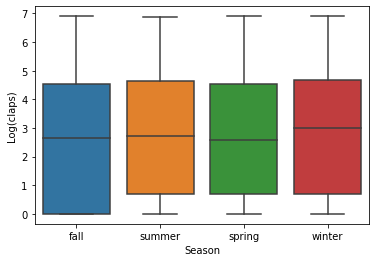

In [46]:
sns.boxplot(X_train['season'], log(y_train))
plt.xlabel('Season')
plt.ylabel('Log(claps)')

## Pictures

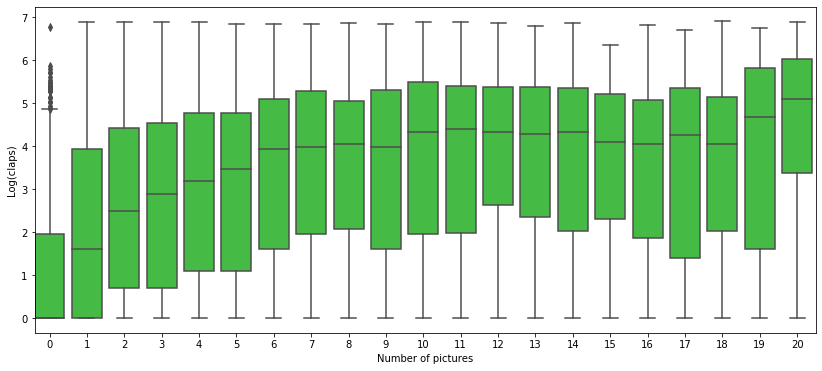

In [47]:
plt.figure(figsize=(14,6))
sns.boxplot(X_train['n_pics'], log(y_train), color='limegreen');
plt.xlim(-.4,20.5);
plt.xlabel('Number of pictures');
plt.xticks(list(range(21)), list(range(21)));
plt.ylabel('Log(claps)');
plt.savefig('img/n_pics.png', bbox_inches='tight');

Include photos! Aim to have at least two. Past six, you get diminishing returns.

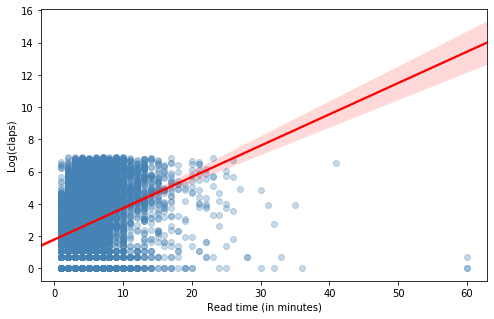

In [48]:
plt.figure(figsize=(8,5))
sns.regplot(X_train['read_time'], log(y_train),
           scatter_kws={'alpha':0.3,'color':'steelblue'},color='red');
plt.xlabel('Read time (in minutes)');
plt.ylabel('Log(claps)');
plt.savefig('img/read_time.png', bbox_inches='tight');

# Categorical features

## Article tags 

I want to turn tags into features. My strategy: take the n most common article tags, plug them into an OLS regression, and see how they fare.

### Turn most popular article tags into features

Helper functions.

In [49]:
from itertools import chain
from collections import Counter

def get_chained_list(column):
    """
    Useful for DataFrame columns with list values. Consolidates values from each list into one single list. 
    """
    return list(chain(*column[~column.isna()]))

def get_top_names(column, top_n=10):
    """
    Extract top names from a column of name lists.
    """
    chained_list = get_chained_list(column)
    top_names = [t[0] for t in Counter(chained_list).most_common(top_n)]     
    return top_names

def make_columns(column, top_names, suffix):
        df = pd.DataFrame()
                           
        for name in top_names:
                df[f"{suffix}_{name}"] = [1 if name in name_list else 0 for name_list in column]
                
        # turn spaces into underlines (to avoid syntax errors)
        df.columns = [col_name.replace(' ','_').replace('.','_') for col_name in list(df.columns)]
        
        return(df)

Define a tag transformer to turn top tags into columns.

In [50]:
from sklearn.base import BaseEstimator, TransformerMixin

class TopTagEncoder(BaseEstimator, TransformerMixin):
    """
    Transforms DataFrame by encoding top n article tags as column features.
    
    Attributes 
    ----------
    df_features : column names for output DataFrame
    tag_features : column names for tag features
    """
    def __init__(self, n):
        self.top_n = n
        self.top_tags = []
        self.tag_features = []
        self.df_features = []
        
    def fit(self, X, y=None):
        self.top_tags = get_top_names(X['tags'], self.top_n)
        return self
    
    def transform(self, X, y=None):
        tags_df = make_columns(X['tags'], self.top_tags, 'tag')
        tags_df = tags_df.set_index(X.index)
        self.tag_features = list(tags_df.columns)
        
        return_df = pd.concat([X, tags_df], axis=1)
        self.df_features = list(return_df.columns)
        return return_df

In [51]:
tag_encoder= TopTagEncoder(30)
X_train = tag_encoder.fit_transform(X_train)
X_test = tag_encoder.transform(X_test)

Some tags are lowercase; i.e. 'Data Science' and 'data science' exist. However, they're separate tag entities so I'm not going to standardize the tags with `lower()`.

In [52]:
ols_summary(X_train, log(y_train), scale_X=True)

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     58.23
Date:                Fri, 27 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:11:02   Log-Likelihood:                -14247.
No. Observations:               10991   AIC:                         2.860e+04
Df Residuals:                   10938   BIC:                         2.899e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

#### Article tags add a significant boost to R-squared

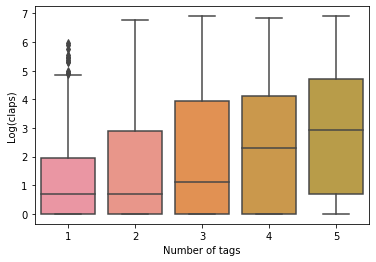

In [55]:
#plt.figure(figsize=(7,5))
sns.boxplot(X_train['n_tags'], log(y_train))
plt.xlim(-.5,4.5)
plt.ylabel('Log(claps)')
plt.xlabel('Number of tags')
plt.savefig('img/tags_boxplot.png')

Text(0.5, 1.0, 'Articles with "Machine Learning" tag get more claps.')

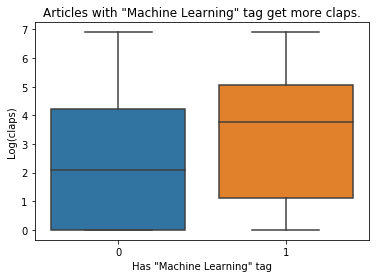

In [54]:
sns.boxplot(X_train['tag_Machine_Learning'], log(y_train))
plt.xlabel('Has "Machine Learning" tag')
plt.ylabel('Log(claps)')
plt.title('Articles with "Machine Learning" tag get more claps.')

**Key takeaway**: use all five available article tags, and use the machine learning tag if it's related to your article.

## Top publications 

Most publications have fairly few submissions, besides the top 3. Towards Data Science is dominant.

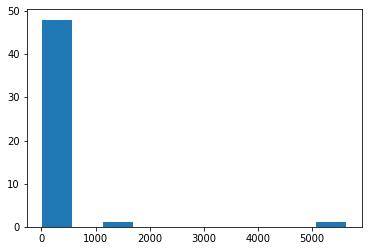

In [35]:
plt.hist(X_train['publication'].value_counts()[:50]);

In [36]:
Counter(X_train['publication']).most_common(20)

[('None', 5642),
 ('Towards Data Science', 1380),
 ('Data Driven Investor', 224),
 ('HackerNoon.com', 92),
 ('Cambridge Spark', 43),
 ('Analytics Vidhya', 42),
 ('Budding Data Scientists', 42),
 ('Good Audience', 42),
 ('Center for Data Science', 38),
 ('learn data science', 36),
 ('freeCodeCamp.org', 36),
 ('The Startup', 36),
 ('Coinmonks', 34),
 ('Becoming Human: Artificial Intelligence Magazine', 32),
 ('dair.ai', 32),
 ('Ciencia y Datos', 26),
 ('Ensina.AI', 24),
 ('Acing AI', 23),
 ('Noteworthy - The Journal Blog', 23),
 ('The Circular Theory', 23)]

Just keep the top 10. Even that is a slight stretch because it's such a low percentage of the articles. However, based on my own knowledge, publications like Analytics Vidhya and freeCodeCamp and Cambridge Spark have fairly large brand names.

In [37]:
class TopPublicationEncoder(BaseEstimator, TransformerMixin):
    """
    Transforms DataFrame by encoding top n publications as column features.
    
    Attributes 
    ----------
    df_features : column names for output DataFrame
    publication_features : column names for tag features
    """
    def __init__(self, n):
        self.top_n = n
        self.top_publications = []
        self.publication_features = []
        self.df_features = []
        
    def fit(self, X, y=None):
        self.top_publications = [t[0] for t in Counter(X['publication']).most_common(self.top_n)]    
        return self
    
    def transform(self, X, y=None):
        publications_df = make_columns(X['publication'], self.top_publications, 'publication')
        publications_df = publications_df.set_index(X.index)
        self.tag_features = list(publications_df.columns)
        
        return_df = pd.concat([X, publications_df], axis=1)
        self.df_features = list(return_df.columns)
        return return_df

In [38]:
publication_encoder = TopPublicationEncoder(10)
X_train = publication_encoder.fit_transform(X_train)
X_test = publication_encoder.transform(X_test)

In [39]:
ols_summary(X_train, log(y_train), scale_X=True)

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     93.49
Date:                Sun, 15 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:25:21   Log-Likelihood:                -13252.
No. Observations:               10991   AIC:                         2.663e+04
Df Residuals:                   10928   BIC:                         2.709e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

Another significant boost to R-squared from encoding publications. Omnibus score increased. What does this mean? 

Text(0, 0.5, 'Log(claps)')

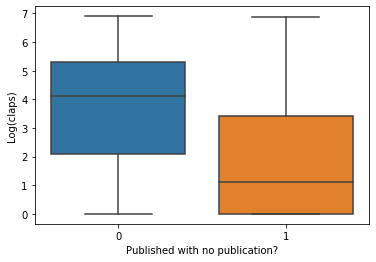

In [40]:
sns.boxplot(X_train['publication_None'],log(y_train));
plt.xlabel('Published with no publication?')
plt.ylabel('Log(claps)')

Text(0, 0.5, 'Log(claps)')

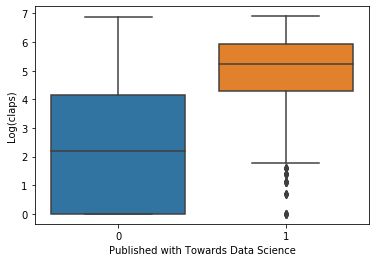

In [41]:
sns.boxplot(X_train['publication_Towards_Data_Science'],log(y_train));
plt.xlabel('Published with Towards Data Science')
plt.ylabel('Log(claps)')

**Key takeaway**: if you plan to write on Medium, make it a goal to publish under a publication. Not publishing under a publication has a dramatic effect on visibility, and therefore decreases claps. Go with either Towards Data Science or FreeCodeCamp.

# Text features 

## Title 

### (a) Capitalization: Does title case matter? (vs sentence case) 

Catch these using `str.istitle()` method. This takes some cleaning but will be fun to plug into the model. Remove all caps words, stop words, punctuation. Then apply `istitle()`.

In [42]:
df['title'].head()

0            AI and Machine Learning in Cyber Security
1    Redefining statistical significance: the stati...
2                   I do not understand t-SNE — Part 1
3            Statistical Analysis with Python: Pokémon
4    สอนให้เครื่องจักรเข้าใจภาษามนุษย์ภายใน code 3 ...
Name: title, dtype: object

In [43]:
import re

def capitalize_first(a_string):
    '''
    Capitalizes first letter of a string. 
    '''
    try:
        new_string = a_string[0].upper() + a_string[1:]
        return new_string
    except:
        print('Invalid string')
        
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 
              'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 
              'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 
              'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 
              'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 
              'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 
              'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 
              'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 
              'further', 'then', 'once', 'here', 'there', 'when', 'where', 'all', 'any', 'both', 
              'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 
              'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now',
              'is', 'a', 'the', 'and', 'over', 'in', 'of']

def remove_stop_words(a_string, stop_words):
    """
    Helper function that removes stop words. Looks them in three ways: lowercase, title case, and all caps.
    """
    stop_words = stop_words + [capitalize_first(x) for x in stop_words] + [x.upper() for x in stop_words]
    non_stop_words = [x for x in a_string.split() if x not in stop_words]
    return ' '.join(non_stop_words)   

def remove_punctuation(a_string):
    """
    Helper function that removes punctuation.
    """
    new_string = re.sub('\.|\||\(|\)|!|\?|·|—|&|…|:','', a_string)
    return new_string

def clean_string(a_string, stop_words):
    """
    Removes stop words and punctuation from a string.
    """
    new_string = remove_punctuation(a_string)
    new_string = remove_stop_words(new_string, stop_words)
    
    return new_string

def remove_upper(a_string):
    """
    Removes words that are in all caps.
    """
    upper_words = a_string.upper().split()
    non_upper = [x for x in a_string.split() if x not in upper_words]
    return ' '.join(non_upper)

def is_title_case(a_string, stop_words):
    """
    Checks if a string is capitalized like a title. Ignores stop words and punctuation.
    """
    cleaned_string = clean_string(remove_upper(a_string), stop_words)
    
    if cleaned_string.istitle():
        return 1
    else:
        return 0

In [44]:
X_train['title_is_title_case'] = X_train['title'].map(lambda x: is_title_case(x, stop_words))
X_test['title_is_title_case'] = X_test['title'].map(lambda x: is_title_case(x, stop_words))

ols_summary(X_train, log(y_train), scale_X=True)

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     92.12
Date:                Sun, 15 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:25:25   Log-Likelihood:                -13249.
No. Observations:               10991   AIC:                         2.663e+04
Df Residuals:                   10927   BIC:                         2.709e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

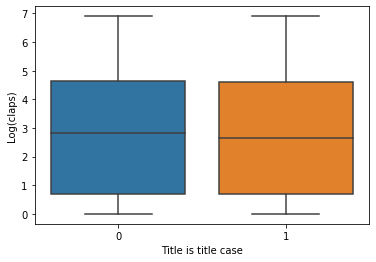

In [121]:
sns.boxplot(X_train['title_is_title_case'], log(y_train))
plt.ylabel('Log(claps)')
plt.xlabel('Title is title case')

**Key takeaway:** Title case doesn't matter! Write your titles however you want.

### b) Top title keywords

Check the top keywords.

In [46]:
title_words = list(chain(*X_train['title'].map(lambda x: x.split())))
title_words = [clean_string(x, stop_words) for x in title_words]
title_words = [x.lower() for x in title_words if len(x) > 1]
Counter(title_words).most_common(50)

[('data', 3561),
 ('science', 1324),
 ('learning', 1066),
 ('how', 859),
 ('machine', 765),
 ('python', 601),
 ('part', 535),
 ('using', 519),
 ('ai', 395),
 ('analysis', 365),
 ('analytics', 312),
 ('2018', 294),
 ('scientist', 257),
 ('why', 256),
 ('de', 253),
 ('deep', 208),
 ('big', 207),
 ('regression', 188),
 ('intelligence', 184),
 ('introduction', 176),
 ('new', 165),
 ('business', 152),
 ('artificial', 146),
 ('model', 143),
 ('week', 135),
 ('neural', 129),
 ('linear', 129),
 ('building', 127),
 ('vs', 123),
 ('time', 121),
 ('world', 117),
 ('pandas', 116),
 ('classification', 114),
 ('guide', 114),
 ('models', 114),
 ('first', 113),
 ('use', 109),
 ('top', 106),
 ('scientists', 105),
 ('visualization', 105),
 ('best', 104),
 ('day', 98),
 ('statistics', 97),
 ('journey', 97),
 ('project', 97),
 ('learn', 96),
 ('need', 95),
 ('series', 91),
 ('ml', 91),
 ('code', 91)]

In [47]:
class TopKeywordEncoder(BaseEstimator, TransformerMixin):
    """
    Transforms DataFrame by encoding top n keywords as column features.
    
    Arguments
    ----------
    keyword_type : string, column name
    n : top n keywords to encode
    
    Attributes 
    ----------
    df_features : column names for output DataFrame
    publication_features : column names for tag features
    """
    def __init__(self, keyword_type, n, stop_words):
        self.keyword_type = keyword_type
        self.stop_words = stop_words
        self.top_n = n
        self.top_keywords = []
        self.keyword_features = []
        self.df_features = []
        
    def fit(self, X, y=None):
        # split and clean words
        words = list(chain(*X_train[self.keyword_type].map(lambda x: x.split())))
        words = [clean_string(x, stop_words) for x in words]
        words = [x.lower() for x in title_words if len(x) > 1]
        
        self.top_keywords = [item[0] for item in Counter(words).most_common(self.top_n)]
        return self
    
    def transform(self, X, y=None):
        keywords_df = make_columns(X[self.keyword_type], self.top_keywords, f'{self.keyword_type}_keyword')
        keywords_df = keywords_df.set_index(X.index)
        self.tag_features = list(keywords_df.columns)
        
        return_df = pd.concat([X, keywords_df], axis=1)
        self.df_features = list(return_df.columns)
        return return_df

In [48]:
title_encoder = TopKeywordEncoder('title', 40, stop_words)
X_train = title_encoder.fit_transform(X_train)
X_test = title_encoder.transform(X_test)

In [49]:
ols_summary(X_train, log(y_train), scale_X=True)

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     57.38
Date:                Sun, 15 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:25:41   Log-Likelihood:                -13207.
No. Observations:               10991   AIC:                         2.662e+04
Df Residuals:                   10887   BIC:                         2.738e+04
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

## Paragraph features

### a) How many digits are there in the paragraphs?

In [50]:
def count_digits(a_string):
    digit_string = ''.join(char for char in a_string if char.isdigit())
    return len(digit_string)

def count_digits_list(string_list):
    return sum([count_digits(string) for string in string_list])

In [51]:
X_train['n_digits_article'] = X_train['paragraphs'].map(count_digits_list)
X_test['n_digits_article'] = X_test['paragraphs'].map(count_digits_list)

Check for the title too.

In [52]:
X_train['n_digits_title'] = X_train['title'].map(count_digits)
X_test['n_digits_title'] = X_test['title'].map(count_digits)

In [53]:
ols_summary(X_train, log(y_train))

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     56.71
Date:                Sun, 15 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:25:48   Log-Likelihood:                -13192.
No. Observations:               10991   AIC:                         2.660e+04
Df Residuals:                   10885   BIC:                         2.737e+04
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

Number of digits in paragraph has a significant effect, at small coefficient. Consider use quadratic version.

### b) Readability score for paragraphs

In [54]:
import textstat

def join_paragraphs(paragraph_list):
    return ' '.join(paragraph_list)

def paragraphs_grade_lvl(paragraphs_list):
    text = join_paragraphs(paragraphs_list)
    return textstat.flesch_kincaid_grade(text)

In [55]:
X_train['article_grade_lvl'] = X_train['paragraphs'].map(paragraphs_grade_lvl)
X_test['article_grade_lvl'] = X_test['paragraphs'].map(paragraphs_grade_lvl)

In [56]:
X_train['title_grade_lvl'] = X_train['title'].map(textstat.flesch_kincaid_grade)
X_test['title_grade_lvl'] = X_test['title'].map(textstat.flesch_kincaid_grade)

In [57]:
ols_summary(X_train, log(y_train))

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     55.64
Date:                Sun, 15 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:27:28   Log-Likelihood:                -13192.
No. Observations:               10991   AIC:                         2.660e+04
Df Residuals:                   10883   BIC:                         2.739e+04
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

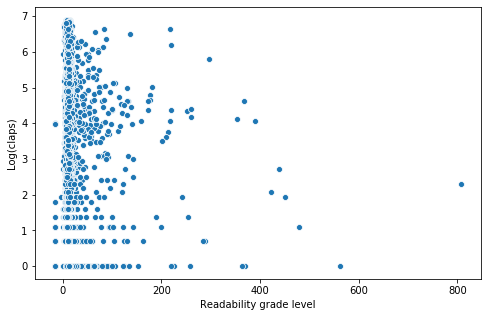

In [61]:
plt.figure(figsize=(8,5))

sns.scatterplot(X_train['article_grade_lvl'], log(y_train))
plt.ylabel('Log(claps)');
plt.xlabel('Readability grade level');
plt.savefig('img/Readability_initial.png')

If we look at the distribution of article grade levels, it appears that a lot of articles go bast grade 18. But does it make sense to see a grade past 50? 

In [63]:
X_train[X_train['article_grade_lvl'] > 50]

,title,subtitle,tags,author,h1_headers,h2_headers,paragraphs,blockquotes,bold_text,italic_text,n_bullet_lists,n_numbered_lists,n_gists,n_code_chunks,n_vids,n_links,publication,read_time,date,title_length,subtitle_length,n_tags,n_h1_headers,n_h2_headers,n_paragraphs,n_bold_text,n_italic_text,n_blockquotes,n_pics,article_length,mean_paragraph_length,year,month,day,day_of_week,season,winter,summer,spring,tag_Data_Science,tag_Machine_Learning,tag_Artificial_Intelligence,tag_Python,tag_Data,tag_Data_Analysis,tag_Data_Visualization,tag_Deep_Learning,tag_Big_Data,tag_AI,tag_Analytics,tag_Technology,tag_Statistics,tag_Programming,tag_R,tag_NLP,tag_Startup,tag_Towards_Data_Science,tag_Blockchain,tag_Tech,tag_Education,tag_Neural_Networks,tag_Marketing,tag_Business,tag_Science,tag_Business_Intelligence,tag_Software_Development,tag_Data_Analytics,tag_Data_Engineering,tag_Visualization,publication_None,publication_Towards_Data_Science,publication_Data_Driven_Investor,publication_HackerNoon_com,publication_Cambridge_Spark,publication_Analytics_Vidhya,publication_Budding_Data_Scientists,publication_Good_Audience,publication_Center_for_Data_Science,publication_learn_data_science,title_is_title_case,title_keyword_data,title_keyword_science,title_keyword_learning,title_keyword_how,title_keyword_machine,title_keyword_python,title_keyword_part,title_keyword_using,title_keyword_ai,title_keyword_analysis,title_keyword_analytics,title_keyword_2018,title_keyword_scientist,title_keyword_why,title_keyword_de,title_keyword_deep,title_keyword_big,title_keyword_regression,title_keyword_intelligence,title_keyword_introduction,title_keyword_new,title_keyword_business,title_keyword_artificial,title_keyword_model,title_keyword_week,title_keyword_neural,title_keyword_linear,title_keyword_building,title_keyword_vs,title_keyword_time,title_keyword_world,title_keyword_pandas,title_keyword_classification,title_keyword_guide,title_keyword_models,title_keyword_first,title_keyword_use,title_keyword_top,title_keyword_scientists,title_keyword_visualization,n_digits_article,n_digits_title,article_grade_lvl,title_grade_lvl
2745,實作手記： 以VGG16 AutoEncoder 擷取台期20日K線特徵,None,"[Data Science, Programming X System Design, Th...",Hallblazzar,"[一、動機, 二、實作, 三、總結]","[1. 環境準備, 2.資料預處理（Data Preprocessing）, 3.訓練模型,...",[因為這個月都在寫回測環境的緣故，這篇從三月初拖到了現在才發。差不多釐清整個回測環境跟規則的...,[因為模型太深，加上圖片太多，一次塞不進顯示卡裡面，這點可以用Batch Size來限制一次...,None,[因為模型太深，加上圖片太多，一次塞不進顯示卡裡面，這點可以用Batch Size來限制一次...,4.0,3.0,0.0,5.0,0.0,10.0,Hallblazzar ：開發者日誌,16.0,2018-03-18,4,1,6,3,5,53,0,5,3,9.0,172.0,3,2018,3,18,6,spring,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,148,4,84.9,7.2
6434,"ELMo, GLoMo, FloydHub Workspaces, AI Principle...",None,"[AI, Machine Learning, NLP, Artificial Intelli...",Elvis,None,None,[Welcome to the 17th Issue of the NLP Newslett...,[],"[On People…, On Education and Research…, On Co...",[Welcome to the 17th Issue of the NLP Newslett...,0.0,0.0,0.0,0.0,0.0,22.0,dair.ai,3.0,2018-06-18,11,1,6,0,0,29,5,2,0,6.0,372.0,13,2018,6,18,0,summer,0,1,0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,0,77.0,9.9
14555,Zero-copy: ликбез,None,"[Cpu, Gpu, Hpc, Big Data, Data Science]",ANNA Systems,None,"[Автор:, Симакин Владимир Андреевич, ИТ-Архите...",[Примечание автора: Данная статья ставит целью...,"[Предисловие, Введение в технологии Zero-copy ...","[Предисловие, Введение в технологии Zero-copy ...","[Примечание автора:, Предисловие, Введение в т...",2.0,1.0,0.0,0.0,0.0,1.0,ANNA Systems,6.0,2018-12-21,2,1,5,0,3,34,9,17,5,5.0,954.0,28,2018,12,21,4,winter,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,0,367.9,8.8
4507,使用 Python 來認識矩陣,透過 NumPy,"[程式設計, 資料科學, 全端開發,

Once we actually inspect them, it actually turns out that these articles are perceived as extremely challenging **because they're written in foreign languages**. In order to clean this data up, I'm going to ignore most of these articles written in a foreign language by using a filter called `is_English()`. 

In [64]:
def is_English(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [65]:
train_foreign_title = ((X_train['article_grade_lvl'] > 16) & (~X_train['title'].apply(is_English)))
X_train = X_train[~train_foreign_title]
y_train = y_train[~train_foreign_title]

test_foreign_title = ((X_test['article_grade_lvl'] > 16) & (~X_test['title'].apply(is_English)))
X_test = X_test[~test_foreign_title]
y_test = y_test[~test_foreign_title]

In [66]:
sum(train_foreign_title)

498

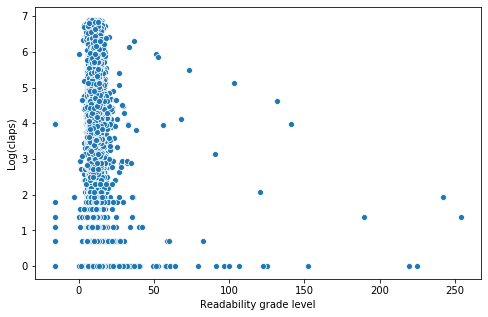

In [69]:
plt.figure(figsize=(8,5))
sns.scatterplot(X_train['article_grade_lvl'], log(y_train));
plt.xlabel('Readability grade level');
plt.ylabel('Log(claps)');
plt.savefig('img/Readability_final.png')

We still have some very high readability grades, past 30 so it'll be helpful to see what's going on.

In [70]:
X_train[X_train['article_grade_lvl']>30]

,title,subtitle,tags,author,h1_headers,h2_headers,paragraphs,blockquotes,bold_text,italic_text,n_bullet_lists,n_numbered_lists,n_gists,n_code_chunks,n_vids,n_links,publication,read_time,date,title_length,subtitle_length,n_tags,n_h1_headers,n_h2_headers,n_paragraphs,n_bold_text,n_italic_text,n_blockquotes,n_pics,article_length,mean_paragraph_length,year,month,day,day_of_week,season,winter,summer,spring,tag_Data_Science,tag_Machine_Learning,tag_Artificial_Intelligence,tag_Python,tag_Data,tag_Data_Analysis,tag_Data_Visualization,tag_Deep_Learning,tag_Big_Data,tag_AI,tag_Analytics,tag_Technology,tag_Statistics,tag_Programming,tag_R,tag_NLP,tag_Startup,tag_Towards_Data_Science,tag_Blockchain,tag_Tech,tag_Education,tag_Neural_Networks,tag_Marketing,tag_Business,tag_Science,tag_Business_Intelligence,tag_Software_Development,tag_Data_Analytics,tag_Data_Engineering,tag_Visualization,publication_None,publication_Towards_Data_Science,publication_Data_Driven_Investor,publication_HackerNoon_com,publication_Cambridge_Spark,publication_Analytics_Vidhya,publication_Budding_Data_Scientists,publication_Good_Audience,publication_Center_for_Data_Science,publication_learn_data_science,title_is_title_case,title_keyword_data,title_keyword_science,title_keyword_learning,title_keyword_how,title_keyword_machine,title_keyword_python,title_keyword_part,title_keyword_using,title_keyword_ai,title_keyword_analysis,title_keyword_analytics,title_keyword_2018,title_keyword_scientist,title_keyword_why,title_keyword_de,title_keyword_deep,title_keyword_big,title_keyword_regression,title_keyword_intelligence,title_keyword_introduction,title_keyword_new,title_keyword_business,title_keyword_artificial,title_keyword_model,title_keyword_week,title_keyword_neural,title_keyword_linear,title_keyword_building,title_keyword_vs,title_keyword_time,title_keyword_world,title_keyword_pandas,title_keyword_classification,title_keyword_guide,title_keyword_models,title_keyword_first,title_keyword_use,title_keyword_top,title_keyword_scientists,title_keyword_visualization,n_digits_article,n_digits_title,article_grade_lvl,title_grade_lvl
7742,Seaborn,None,"[Data Science, Visualization, Python]",YuChieh Chen,None,None,[Matplotlib是很好用，但是指令實在給他有點複雜，今天碰巧小學到seaborn，記錄...,[],None,None,0.0,0.0,0.0,0.0,0.0,0.0,None,1.0,2018-07-18,1,1,3,0,0,5,0,0,0,2.0,27.0,5,2018,7,18,2,summer,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,30.3,-3.5
12497,Ultimate guide and resources for Data science ...,None,"[🎓 TUTORIALS, Data Science, Machine Learning, ...",purnasai gudikandula,"[Trending AI Articles:, Resources :, finally, ...","[A)Programming language: Python and R?, B)what...",[if you know Data science for some extent plea...,[1. Face recognition: realtime masks developme...,[Exploratory data analysis using habberman dat...,"[self taught, class room, confused, job, portf...",0.0,2.0,0.0,0.0,0.0,20.0,Becoming Human: Artificial Intelligence Magazine,6.0,2018-10-29,8,1,6,4,8,55,27,8,1,6.0,1164.0,21,2018,10,29,0,fall,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,26,4,33.4,6.4
12396,Multi-Class Text Classification with SKlearn a...,None,"[Machine Learning, Data Science, Software Engi...",Nasir Safdari,"[The Problem:, Data Engineering:, Classificati...",[So the main question is: how do we categorize...,[Recently I worked on a software engineering r...,[],[how do we categorize the developers work by l...,None,3.0,0.0,0.0,5.0,0.0,1.0,Towards Data Science,7.0,2018-10-25,14,1,5,4,1,20,10,0,0,6.0,1017.0,51,2018,10,25,3,fall,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,51.7,9.9
10343,How to Install Anaconda on Ubuntu,None,"[Ubuntu, Anaconda, Data 

In [71]:
X_train[X_train['article_grade_lvl']>30].loc[5550,'paragraphs']

['จงจรชีวิต ของ Data Science เมื่อทำ ML',
 'กำหนดเป้าหมาย ที่เราต้องการ อย่าลืม ต้องกำหนดสมมุติฐานถึงต้นเหตุ ที่ทำให้เป้าหมายเกิดขึ้น เช่น',
 'เงินเดือน เพศ อายุ ระดับการศึกษา จังหวัดที่อาศัย ส่งผลต่อ ค่าใช้จ่ายในการเดินทางอย่างไร',
 'เก็บรวบรวมข้อมูล ตาม Objective ที่ตั้งไว้',
 'ข้อมูลที่เก็บได้ จะต้องนำมาทำให้อยู่ในรูปแบบเดียวกัน เช่น จังหวัด ที่อาจเป็นตัวย่อ หรือชื่อจังหวัดที่เขียนไม่ครบ การเว้นวรรค หรือช่องว่าง ต้องถูกทำความสะอาด ให้เรียบร้อย',
 'เป็นขั้นตอนสำคัญ ที่เราจะต้องนำ Data มาพิจารณาถึงความเกี่ยวโยง ความสัมพันธ์ รูปทรง ลักษณะของข้อมูล',
 'โดยส่วนใหญ่ จะเป็นการนำข้อมูล มาพล็อต ลงกราฟ หรือมาทำเป็นรูป หรือเป็นตาราง ซึ่งเป้าหมายหลักคือ ให้เราได้มองเห็นถึงความสัมพันธ์ของข้อมูลและทำให้เราสามารถเลือก Feature ของข้อมูลที่นำมาใช้ได้ถูกต้อง',
 'อ่านเกี่ยวกับ **Feature คลิกที่นี่',
 'ในบางโจทย์ เพียงแค่เราได้ทำขั้นตอนนี้ สามารถตอบปัญหาได้อย่างคร่าวๆเลยทีเดียว ว่าข้อมูลส่งผลกระทบกันอย่างไร',
 'เมื่อเราทราบตวามเกี่ยวโยงและความสัมพันธ์ของข้อมูล จะทำให้เราเลือกประเภท Model ได้ถูกต้องยิ่ง

As you can see, there's still many articles whose titles are in English, but whose contents are in a different language. The next filtering step I'll use is to find articles whose readability grade exceeds 30 and has paragraphs written in non-English. These are likely written in a foreign language.

In [72]:
train_foreign_paragraph = ((X_train['article_grade_lvl']>30) & (X_train['paragraphs'].map(lambda x: any([not is_English(paragraph) for paragraph in x]))))
X_train = X_train[~train_foreign_paragraph]
y_train = y_train[~train_foreign_paragraph]

test_foreign_paragraph = ((X_test['article_grade_lvl']>30) & (X_test['paragraphs'].map(lambda x: any([not is_English(paragraph) for paragraph in x]))))
X_test = X_test[~test_foreign_paragraph]
y_test = y_test[~test_foreign_paragraph]

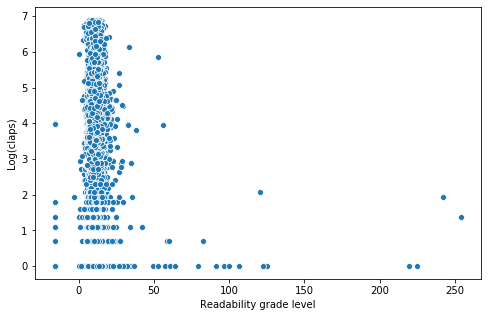

In [73]:
plt.figure(figsize=(8,5))
sns.scatterplot(X_train['article_grade_lvl'], log(y_train))
plt.xlabel('Readability grade level');
plt.ylabel('Log(claps)');


This looks much cleaner than what we started with. I'm going to do one last inspection to see what these difficult-to-read articles look like.

In [74]:
X_train[X_train['article_grade_lvl'] > 50].head()

,title,subtitle,tags,author,h1_headers,h2_headers,paragraphs,blockquotes,bold_text,italic_text,n_bullet_lists,n_numbered_lists,n_gists,n_code_chunks,n_vids,n_links,publication,read_time,date,title_length,subtitle_length,n_tags,n_h1_headers,n_h2_headers,n_paragraphs,n_bold_text,n_italic_text,n_blockquotes,n_pics,article_length,mean_paragraph_length,year,month,day,day_of_week,season,winter,summer,spring,tag_Data_Science,tag_Machine_Learning,tag_Artificial_Intelligence,tag_Python,tag_Data,tag_Data_Analysis,tag_Data_Visualization,tag_Deep_Learning,tag_Big_Data,tag_AI,tag_Analytics,tag_Technology,tag_Statistics,tag_Programming,tag_R,tag_NLP,tag_Startup,tag_Towards_Data_Science,tag_Blockchain,tag_Tech,tag_Education,tag_Neural_Networks,tag_Marketing,tag_Business,tag_Science,tag_Business_Intelligence,tag_Software_Development,tag_Data_Analytics,tag_Data_Engineering,tag_Visualization,publication_None,publication_Towards_Data_Science,publication_Data_Driven_Investor,publication_HackerNoon_com,publication_Cambridge_Spark,publication_Analytics_Vidhya,publication_Budding_Data_Scientists,publication_Good_Audience,publication_Center_for_Data_Science,publication_learn_data_science,title_is_title_case,title_keyword_data,title_keyword_science,title_keyword_learning,title_keyword_how,title_keyword_machine,title_keyword_python,title_keyword_part,title_keyword_using,title_keyword_ai,title_keyword_analysis,title_keyword_analytics,title_keyword_2018,title_keyword_scientist,title_keyword_why,title_keyword_de,title_keyword_deep,title_keyword_big,title_keyword_regression,title_keyword_intelligence,title_keyword_introduction,title_keyword_new,title_keyword_business,title_keyword_artificial,title_keyword_model,title_keyword_week,title_keyword_neural,title_keyword_linear,title_keyword_building,title_keyword_vs,title_keyword_time,title_keyword_world,title_keyword_pandas,title_keyword_classification,title_keyword_guide,title_keyword_models,title_keyword_first,title_keyword_use,title_keyword_top,title_keyword_scientists,title_keyword_visualization,n_digits_article,n_digits_title,article_grade_lvl,title_grade_lvl
10343,How to Install Anaconda on Ubuntu,None,"[Ubuntu, Anaconda, Data Science, Python, Machi...",Yaz,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",[Downloads - Anaconda],[go to the anaconda downloads page to get the ...,[],[1],None,0.0,0.0,0.0,8.0,0.0,0.0,None,3.0,2018-09-17,6,1,5,13,1,16,1,0,0,13.0,243.0,15,2018,9,17,0,fall,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,96.9,6.8
1216,What makes a strong Chief Data Officer?,None,"[Data Science, Chief Information Officer]",Frank J. Wyatt,None,None,[The CDO is the custodial role managing the fr...,[],[The CDO is the custodial role managing the fr...,None,0.0,0.0,0.0,0.0,0.0,0.0,On Business Process Management and Workflow Au...,2.0,2018-02-04,7,1,2,0,0,9,9,0,0,2.0,274.0,30,2018,2,4,6,winter,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57.7,3.7
3250,Phoenix Devpreneur Events (Apr. 2nd-Apr. 8th),None,"[Startup, Entrepreneurship, Data Science, Soft...",Chris Huie,"[Monday (Apr. 2nd), Tuesday (Apr. 3rd), Wednes...",None,[Object Detection using Tensorflow | 6pm @ Gal...,[Object Detection using Tensorflow | 6pm @ Gal...,[| 6pm @ GalvanizePhoenix TensorFlow User Grou...,"[Phoenix TensorFlow User Group, SouthWest Secu...",0.0,0.0,0.0,0.0,0.0,24.0,Phoenix Tech Nerd,2.0,2018-04-02,6,1,5,6,0,20,24,39,5,0.0,278.0,14,2018,4,2,0,spring,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,2,100.1,2.1
11992,User Activity Categorization,None,"[Python, Machine Learning, Data Science, NLP, ...",VIGHNESH TIWARI,"[Objectives :-, Working :-, Database EER Diagr...

At a glance I'll drop 5503, 1844, 4523, 4042, 8968. These all include a different language. The two articles that have "Air Compressor" in the name are written so poorly that they're considered difficult reading. I'll drop those as well. Once these rows are dropped, I think the article grade will be clean enough to move on.

In [75]:
try: 
    X_train.drop([5503,1844,4523,4042, 8968, 7996, 7997], axis=0, inplace=True)
    y_train.drop([5503,1844,4523,4042, 8968, 7996, 7997], axis=0, inplace=True)
except:
    print("Rows already dropped.")
    
ols_summary(X_train, log(y_train), scale_X=True)

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     56.24
Date:                Sun, 15 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:46:05   Log-Likelihood:                -12441.
No. Observations:               10461   AIC:                         2.510e+04
Df Residuals:                   10353   BIC:                         2.588e+04
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

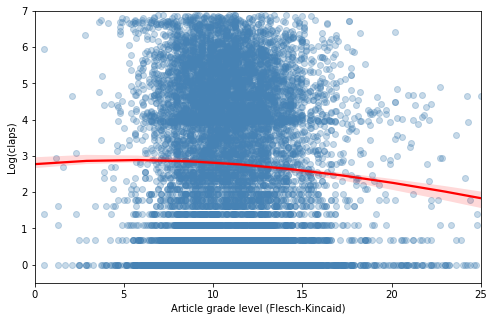

In [122]:
plt.figure(figsize=(8,5));
sns.regplot(X_train['article_grade_lvl'], np.log(y_train+1), 
            scatter_kws={'alpha':0.3,'color':'steelblue'},
            color='red', order=4
           );

plt.xlim(0,25);
plt.ylim(-.5,7);
plt.ylabel('Log(claps)');
plt.xlabel('Article grade level (Flesch-Kincaid)');
plt.savefig('img/article_grade_lvl.png')

Article readability peaks at grade level 10 and 11. Try modeling it with a 2nd or 3rd order polynomial.

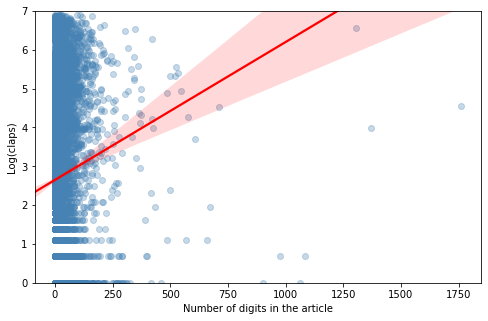

In [119]:
plt.figure(figsize=(8,5));

plt.ylim(0, 7)

sns.regplot(X_train['n_digits_article'], log(y_train),
            scatter_kws={'alpha':0.3,'color':'steelblue'},
            color='red'
           );
plt.xlabel('Number of digits in the article');
plt.ylabel('Log(claps)');
plt.savefig('img/num_digits_article.png')

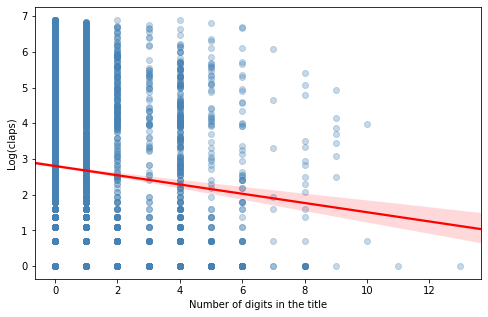

In [115]:
plt.figure(figsize=(8,5));

sns.regplot(X_train['n_digits_title'], log(y_train),
            scatter_kws={'alpha':0.3,'color':'steelblue'},
            color='red'
           );
plt.xlabel('Number of digits in the title');
plt.ylabel('Log(claps)');
plt.savefig('img/digits_in_title.png')

Text(0.5, 0, 'Has code chunks')

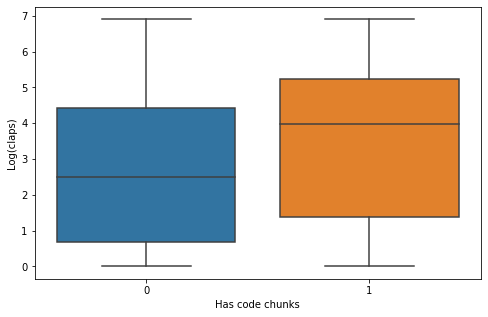

In [79]:
plt.figure(figsize=(8,5))
sns.boxplot([1 if n > 0 else 0 for n in X_train['n_code_chunks']], log(y_train))
plt.ylabel('Log(claps)')
plt.xlabel('Has code chunks')

Ideal reading level is around around 10. Higher grade levels indicate typos or non-recognizable English. Overall,  difficulty of reading is important for claps.

### Sentiment score of title

In [80]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

X_train['sentiment_title'] = [analyzer.polarity_scores(title)['compound'] for title in X_train['title']]
X_test['sentiment_title'] = [analyzer.polarity_scores(title)['compound'] for title in X_test['title']]

Text(0, 0.5, 'Log(claps)')

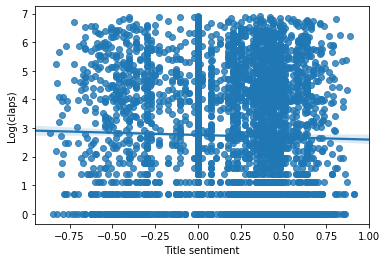

In [81]:
sns.regplot(X_train['sentiment_title'], log(y_train));
plt.xlabel('Title sentiment')
plt.ylabel('Log(claps)')

In [82]:
ols_summary(X_train, log(y_train), scale_X=True)

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     55.72
Date:                Sun, 15 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:46:14   Log-Likelihood:                -12441.
No. Observations:               10461   AIC:                         2.510e+04
Df Residuals:                   10352   BIC:                         2.589e+04
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

Title sentiment isn't really important.

## One last round of feature engineering

###  a) Text features

#### Standard deviation of paragraph length

In [83]:
from sklearn.impute import SimpleImputer

def std_paragraph_length(paragraph_list):
    if len(paragraph_list) < 1:
        return np.nan
    else:
        paragraph_length = [len(paragraph.split()) for paragraph in paragraph_list]
        return np.std(paragraph_length)    

def reshape(series):
    return series.values.reshape(-1,1)

In [84]:
X_train['std_paragraph_length'] = X_train['paragraphs'].apply(std_paragraph_length)
X_test['std_paragraph_length'] = X_test['paragraphs'].apply(std_paragraph_length)

imputer = SimpleImputer()
X_train['std_paragraph_length'] = imputer.fit_transform(reshape(X_train['std_paragraph_length']))
X_test['std_paragraph_length'] = imputer.transform(reshape(X_test['std_paragraph_length']))

####  Number of bold words

In [85]:
X_train['bold_text_length'] = X_train['bold_text'].apply(count_list_words)
X_test['bold_text_length'] = X_test['bold_text'].apply(count_list_words)

X_train['bold_text_length'] = imputer.fit_transform(reshape(X_train['bold_text_length']))
X_test['bold_text_length'] = imputer.transform(reshape(X_test['bold_text_length']))

####  Number of italic words

In [86]:
X_train['italic_text_length'] = X_train['italic_text'].apply(count_list_words)
X_test['italic_text_length'] = X_test['italic_text'].apply(count_list_words)

X_train['italic_text_length'] = imputer.fit_transform(reshape(X_train['italic_text_length']))
X_test['italic_text_length'] = imputer.transform(reshape(X_test['italic_text_length']))

###  Interaction terms

In [87]:
list(set(X_train.select_dtypes(np.number).columns) - {'day','day_of_week', 'month', 'year'})

['title_keyword_neural',
 'title_keyword_world',
 'tag_Tech',
 'tag_Business_Intelligence',
 'title_keyword_week',
 'title_keyword_first',
 'tag_Artificial_Intelligence',
 'title_keyword_top',
 'winter',
 'title_keyword_scientist',
 'summer',
 'title_keyword_part',
 'title_grade_lvl',
 'n_numbered_lists',
 'tag_Technology',
 'title_keyword_models',
 'read_time',
 'article_grade_lvl',
 'tag_Visualization',
 'title_keyword_new',
 'tag_Blockchain',
 'tag_Education',
 'publication_Budding_Data_Scientists',
 'publication_Center_for_Data_Science',
 'title_keyword_2018',
 'title_keyword_model',
 'title_keyword_how',
 'tag_Machine_Learning',
 'tag_Towards_Data_Science',
 'tag_Business',
 'tag_Startup',
 'title_keyword_scientists',
 'title_keyword_artificial',
 'title_keyword_classification',
 'title_keyword_learning',
 'tag_Python',
 'title_keyword_analysis',
 'title_keyword_introduction',
 'subtitle_length',
 'sentiment_title',
 'tag_Statistics',
 'tag_NLP',
 'mean_paragraph_length',
 'tag_So

In [88]:
X_train['article_length'] = imputer.fit_transform(reshape(X_train['article_length']))
X_test['article_length'] = imputer.transform(reshape(X_test['article_length']))

In [89]:
X_train['pics_per_paragraph'] = X_train['n_pics']/(X_train['n_paragraphs']+1)
X_test['pics_per_paragraph'] = X_test['n_pics']/(X_test['n_paragraphs']+1)

In [90]:
ols_summary(X_train, log(y_train), scale_X=True)

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     54.54
Date:                Sun, 15 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:46:17   Log-Likelihood:                -12468.
No. Observations:               10498   AIC:                         2.516e+04
Df Residuals:                   10385   BIC:                         2.598e+04
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [92]:
X_train.columns

Index(['title', 'subtitle', 'tags', 'author', 'h1_headers', 'h2_headers',
       'paragraphs', 'blockquotes', 'bold_text', 'italic_text',
       ...
       'title_keyword_visualization', 'n_digits_article', 'n_digits_title',
       'article_grade_lvl', 'title_grade_lvl', 'sentiment_title',
       'std_paragraph_length', 'bold_text_length', 'italic_text_length',
       'pics_per_paragraph'],
      dtype='object', length=129)

In [112]:
y_train[X_train['n_digits_title']==0].mean()

96.44709692898273

In [113]:
y_train[X_train['n_digits_title']>0].mean()

83.91628122109158

In [114]:
y_train[X_train['n_digits_title']>5].mean()

47.79661016949152

# Data checkpoint: save data

In [85]:
X_train.to_csv('X_train.csv', header=True, index=False)
y_train.to_csv('y_train.csv', header=True, index=False)
X_test.to_csv('X_test.csv', header=True, index=False)
y_test.to_csv('y_test.csv', header=True, index=False)

# Modeling 

In [86]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

## Naive baseline

In [105]:
from sklearn.metrics import mean_absolute_error, mean_absolute_error

naive_pred = pd.Series(np.mean(y_train)).repeat(len(y_train))
mean_absolute_error(y_train, naive_pred)

113.74913165109133

Create scaled dataset for benchmarking.

In [97]:
import matplotlib
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
model_features = set(X_train.select_dtypes(np.number).columns) - set(['year','month','day', 'day_of_week'])
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[model_features]), columns=model_features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[model_features]), columns=model_features)

## Lasso

https://stats.stackexchange.com/questions/367155/why-lasso-for-feature-selection

In [98]:
from sklearn.linear_model import LassoCV

lasso_alphas = 10**np.linspace(-5,0,1000)
lasso_cv = LassoCV(alphas = lasso_alphas, cv=5)
lasso_cv.fit(X_train_scaled, log(y_train))
lasso_cv.alpha_

/Users/collindching/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.007996554525892346

In [103]:
from sklearn.linear_model import Lasso
np.random.seed(4)

lasso = Lasso(alpha=lasso_cv.alpha_)
lasso_cv_log_mae = np.mean(-cross_val_score(lasso, X_train_scaled, log(y_train), scoring='neg_mean_absolute_error', cv=5))
lasso_cv_log_mae

3.0576655753799407

In [106]:
from sklearn.model_selection import cross_val_predict
np.random.seed(4)

lasso_cv_pred = np.exp(cross_val_predict(lasso, X_train_scaled, log(y_train), cv=5))
lasso_mae = mean_absolute_error(y_train, lasso_cv_pred)
lasso_mae

3010.5336951960394

In [663]:
lasso_cv_coefs = list(zip(model_features, lasso_cv.coef_/scaler.scale_))
lasso_features = [x[0] for x in lasso_cv_coefs if x[1] > 0]
len(lasso_features)

59

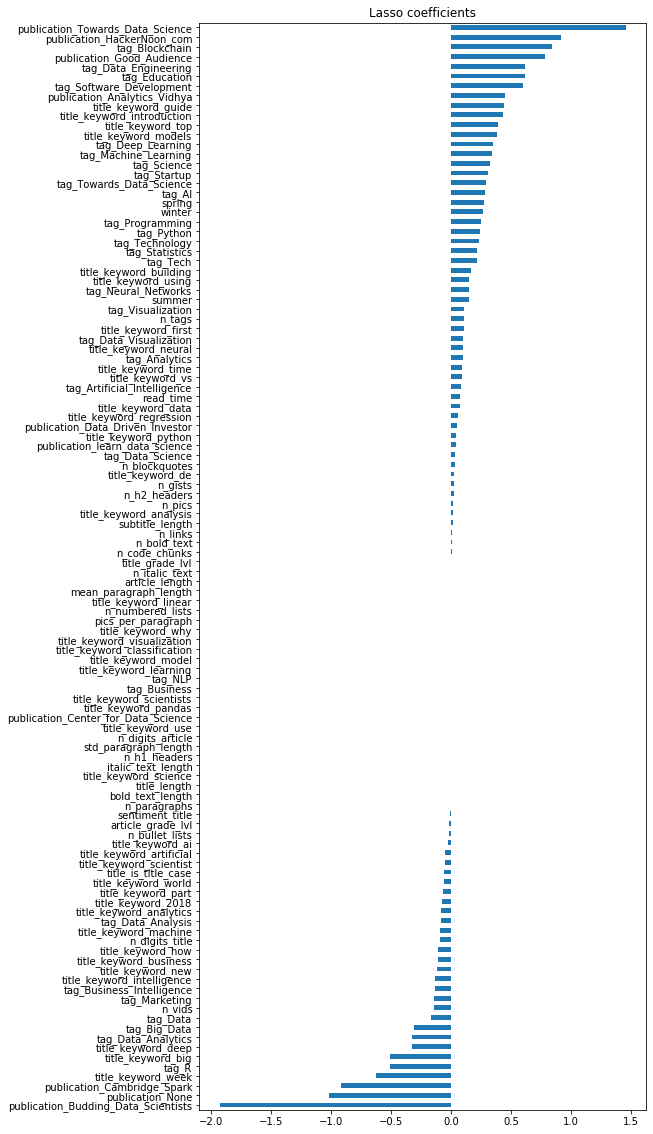

In [664]:
plt.figure(figsize=(8,20))
coef = pd.Series([x[1] for x in lasso_cv_coefs], index=model_features)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Lasso coefficients");

## Ridge 

In [665]:
from sklearn.linear_model import RidgeCV

ridge_alphas = 10**np.linspace(0,4,200)
ridge_cv = RidgeCV(ridge_alphas, cv=5)
ridge_cv.fit(X_train_scaled, log(y_train))
ridge_cv.alpha_

651.7339604882427

In [666]:
from sklearn.linear_model import Ridge
np.random.seed(4)

ridge = Ridge(alpha=ridge_cv.alpha_)
ridge_pred = np.exp(cross_val_predict(ridge, X_train_scaled, log(y_train), cv=5))
ridge_mae = mean_absolute_error(y_train, ridge_pred)
ridge_mae

3085.110371699255

In [667]:
ridge_cv_coefs = list(zip(model_features, ridge_cv.coef_/scaler.scale_))
ridge_features = [x[0] for x in ridge_cv_coefs if x[1] > 0]
len(ridge_features)

68

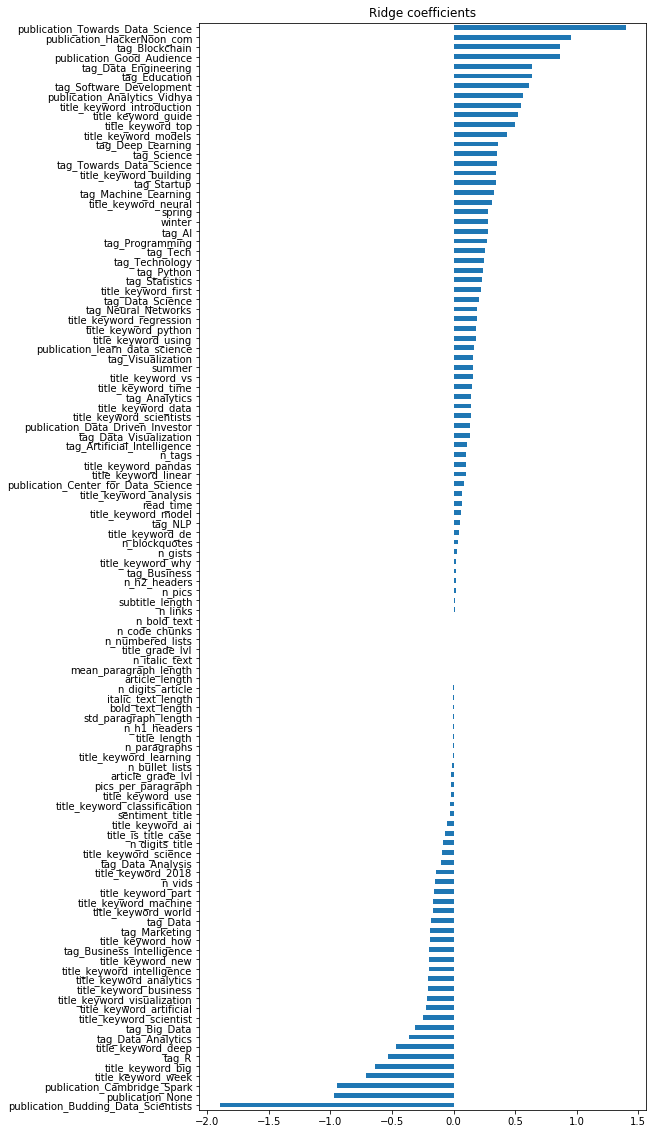

In [668]:
plt.figure(figsize=(8,20))
coef = pd.Series([x[1] for x in ridge_cv_coefs], index=model_features)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Ridge coefficients");

## ElasticNet

In [669]:
from sklearn.linear_model import ElasticNetCV
np.random.seed(4)

en_alpha = 10**np.linspace(-5,0,100)
en_lambda = np.linspace(0 + 1/200,1,200)
en_cv = ElasticNetCV(l1_ratio = en_lambda, n_alphas = 100, cv=5)
en_cv.fit(X_train_scaled, log(y_train))

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045,
       0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 ,
       0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 , 0.135,
       0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175, 0.18 ,
       0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 , 0.225,
       0.23 , 0.235, 0.24 , 0...
       0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.845, 0.85 , 0.855,
       0.86 , 0.865, 0.87 , 0.875, 0.88 , 0.885, 0.89 , 0.895, 0.9  ,
       0.905, 0.91 , 0.915, 0.92 , 0.925, 0.93 , 0.935, 0.94 , 0.945,
       0.95 , 0.955, 0.96 , 0.965, 0.97 , 0.975, 0.98 , 0.985, 0.99 ,
       0.995, 1.   ]),
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [670]:
from sklearn.linear_model import ElasticNet
np.random.seed(4)

en = ElasticNet(en_cv.alpha_, en_cv.l1_ratio_)
en_pred = np.exp(cross_val_predict(en, X_train_scaled, log(y_train), cv=5))
en_mae = mean_absolute_error(y_train, en_pred)
en_mae

2873.7701825654203

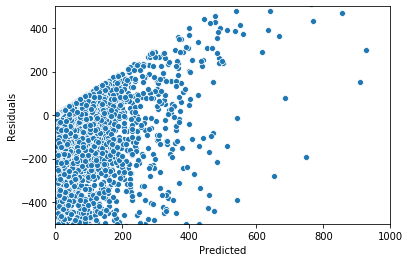

In [682]:
plt.figure(figsize=(6,4))

en_residuals = en_pred - y_train
sns.scatterplot(en_pred, en_residuals)
plt.xlim(0,1000)
plt.ylim(-500,500)
plt.ylabel('Residuals');
plt.xlabel('Predicted');

In [227]:
en_cv_coefs = list(zip(model_features, en_cv.coef_/scaler.scale_))
en_features = [x[0] for x in en_cv_coefs if x[1] > 0]
len(en_features)

62

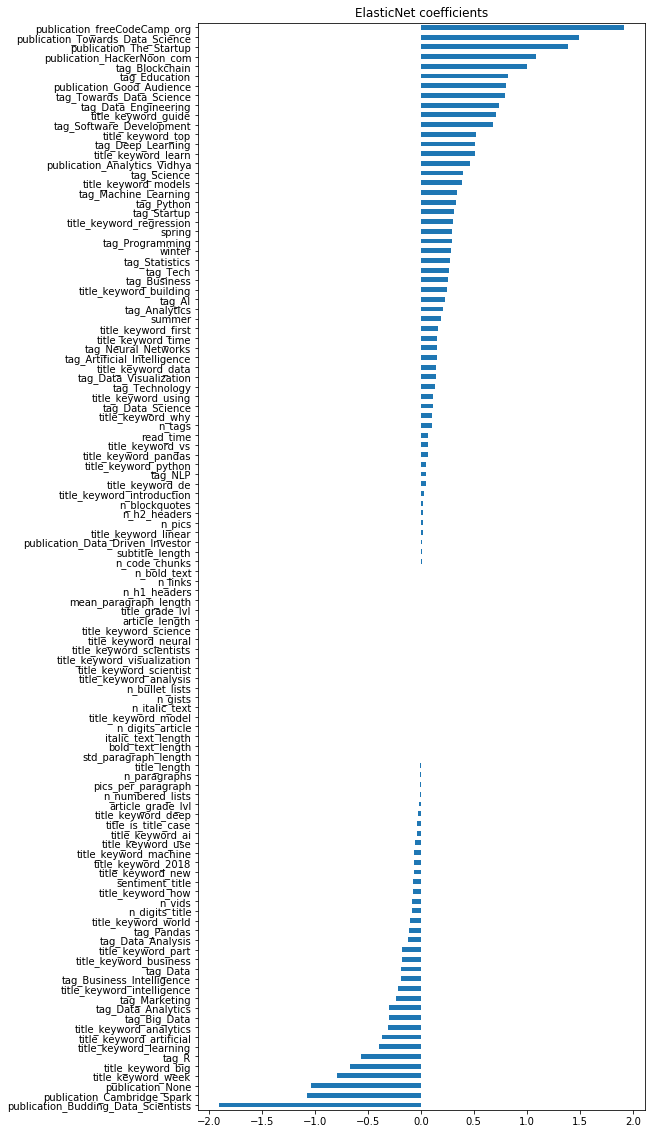

In [226]:
plt.figure(figsize=(8,20))
coef = pd.Series([x[1] for x in en_cv_coefs], index=model_features)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("ElasticNet coefficients");

Not only does ElasticNet outperforms the other two models in terms of mean absolute error, and also does a fair job at simplifying the model. 

# StatsModel from Lasso

In [999]:
'day_of_week' in lasso_cv_features

False

In [1007]:
data_sm = pd.concat([np.log(y_train+1), X_train[lasso_cv_features]], axis=1)    
data_sm[lasso_cv_features] = scaler.fit_transform(data_sm[lasso_cv_features])

formula = build_formula('n_claps', lasso_cv_features)
mod = smf.ols(formula, data_sm)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     135.2
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:06:25   Log-Likelihood:                -22482.
No. Observations:               11012   AIC:                         4.507e+04
Df Residuals:                   10961   BIC:                         4.544e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

# Check again

In [1008]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(lasso_cv.alpha_)
lasso_model.fit(X_train_scaled[lasso_cv_features], np.log(y_train+1))

Lasso(alpha=0.00897331581458352, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1010]:
y_pred = lasso_model.predict(X_test_scaled[lasso_cv_features])

In [1011]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

In [1013]:
mae(y_test, np.exp(y_pred))

187.34033016944994

In [1014]:
res = y_test - y_pred

Text(0, 0.5, 'Residuals')

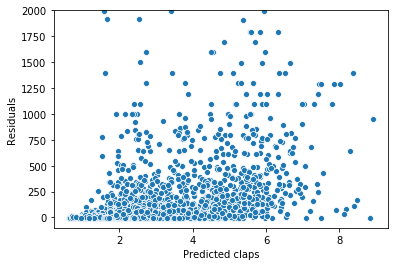

In [1018]:
sns.scatterplot(y_pred, res)
plt.ylim(-100,2000)
plt.xlabel('Predicted claps')
plt.ylabel('Residuals')

In [ ]:
lasso_model.fit(X_)

In [609]:
list(zip(X_train_scaled.columns, lasso_model.coef_))

[('tag_Data', -0.038896233045591165),
 ('publication_Coinmonks', 0.04666639683257522),
 ('title_keyword_2018', -0.013924547769326058),
 ('tag_Data_Scientist', -0.5684984769198934),
 ('tag_Mathematics', 0.004711036658239982),
 ('publication_None', 0.08009516403386471),
 ('title_keyword_model', -0.029328562518994444),
 ('title_keyword_python', 0.05078579659286101),
 ('title_keyword_neural', 0.12002601464813924),
 ('tag_Fintech', -0.03203655171293014),
 ('n_h1_headers', 0.10341034901999664),
 ('title_keyword_deep', 0.03575554383278275),
 ('tag_Software_Development', 0.05897803274174943),
 ('tag_Data_Analytics', 0.04440854141137652),
 ('tag_Technology', -0.012587420715543508),
 ('sentiment_title', 0.06888267871050249),
 ('tag_Deep_Learning', -0.004475011184317516),
 ('title_keyword_week', 0.0324709857384439),
 ('tag_Design', 0.03359648894986356),
 ('article_grade_lvl', -0.0015300452686747596),
 ('tag_Healthcare', 0.03525152813410954),
 ('publication_Analytics_Vidhya', 0.12192100228540728),

In [610]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(ridge_modelCV.alpha_)
ridge_model.fit(X_train_scaled[filtered_features_2], np.log(y_train+1))

Ridge(alpha=573.8441648302393, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [611]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [612]:
kf = KFold(n_splits=5, shuffle=True, random_state=10)

In [614]:
print(np.mean(cross_val_score(ridge_model, X_train_scaled[filtered_features_2], np.log(y_train+1), cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lasso_model, X_train_scaled[filtered_features_2], np.log(y_train+1), cv=kf, scoring='r2')))

0.3979215072204026
0.3973000101013735


In [624]:
data_sm = pd.concat([np.log(y_train+1), X_train[model_features]], axis=1)
formula = build_formula('n_claps', filtered_features_2)
mod = smf.ols(formula, data_sm)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     98.16
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        01:00:58   Log-Likelihood:                -22124.
No. Observations:               10981   AIC:                         4.441e+04
Df Residuals:                   10902   BIC:                         4.498e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [623]:
data_sm = pd.concat([np.log(y_train+1), X_train[filtered_features_2]], axis=1)
formula = build_formula('n_claps', filtered_features_2)
mod = smf.ols(formula, data_sm)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     98.16
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        00:58:03   Log-Likelihood:                -22124.
No. Observations:               10981   AIC:                         4.441e+04
Df Residuals:                   10902   BIC:                         4.498e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

Build residuals plot

# Predict on test data w best model

In [634]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

In [635]:
y_pred = ridge_modelCV.predict(X_test_scaled)

In [636]:
X_test_scaled

,tag_Data,publication_Coinmonks,title_keyword_2018,tag_Data_Scientist,tag_Mathematics,publication_None,title_keyword_model,title_keyword_python,title_keyword_neural,tag_Fintech,n_h1_headers,title_keyword_deep,tag_Software_Development,tag_Data_Analytics,tag_Technology,sentiment_title,tag_Deep_Learning,title_keyword_week,tag_Design,article_grade_lvl,tag_Healthcare,publication_Analytics_Vidhya,tag_Science,title_keyword_business,title_keyword_pandas,tag_Artificial_Intelligence,read_time,title_keyword_ai,tag_Web_Development,tag_Data_Visualization,title_keyword_analytics,title_keyword_intelligence,tuesday,title_keyword_new,winter,tag_Education,tag_Visualization,title_keyword_data,spring,tag_Privacy,title_keyword_de,n_gists,n_tags,title_is_title_case,tag_Data_Analysis,title_keyword_using,tag_Business,article_length,summer,tag_Data_Science,tag_Analytics,tag_Neural_Networks,n_code_chunks,n_blockquotes,title_grade_lvl,tag_Startup,title_keyword_linear,title_keyword_analysis,tag_Business_Intelligence,tag_Blockchain,publication_Data_Driven_Investor,tag_Finance,tag_Computer_Vision,subtitle_length,title_keyword_learning,publication_Cambridge_Spark,n_digits_title,title_keyword_part,title_keyword_building,tag_Marketing,tag_AI,title_keyword_why,title_keyword_machine,tag_Politics,tag_Statistics,tag_Tech,title_keyword_big,mean_paragraph_length,n_h2_headers,tag_Towards_Data_Science,n_vids,tag_Kaggle,tag_Engineering,title_length,publication_Good_Audience,n_bullet_lists,title_keyword_scientist,title_keyword_guide,tag_Learning,title_keyword_regression,title_keyword_artificial,tag_Algorithms,tag_Programming,title_keyword_introduction,n_numbered_lists,tag_Machine_Learning,wednesday,tag_Computer_Science,n_pics,tag_Coding,title_keyword_how,tag_Data_Engineering,tag_Big_Data,n_digits_paragraph,tag_Careers,tag_R,n_paragraphs,publication_HackerNoon_com,publication_freeCodeCamp_org,tag_Linear_Regression,publication_Towards_Data_Science,n_italic_text,title_keyword_science,tag_Python,tag_Pandas,tag_NLP,n_bold_text,tag_Cryptocurrency,publication_Center_for_Data_Science,n_links
0,-0.324133,-0.058928,-0.17739,-0.105555,-0.110726,-0.987241,-0.102423,-0.049647,-0.027001,-0.09292,-0.066634,-0.05573,-0.117284,-0.11405,-0.241047,-1.261992,-0.301137,-0.054061,-0.100129,0.496970,-0.094894,-0.065563,-0.123131,-0.061963,-0.05234,-0.430215,1.704665,-0.249189,-0.085667,-0.286877,-0.0627,-0.042716,-0.427984,-0.08727,-0.531815,-0.147236,-0.113228,-0.273647,-0.556137,-0.097783,-0.418260,-0.103169,-0.481046,1.051118,-0.292418,-0.176569,-0.130904,2.016915,-0.600318,0.038199,-0.265680,-0.134107,-0.297362,-0.328669,-0.784284,-0.144960,-0.034428,-0.090905,-0.1124,-0.146589,-0.145287,-0.089881,-0.089881,-0.305652,-0.136549,-0.060465,-0.382838,-0.081807,-0.041632,-0.125398,-0.27017,-0.068978,-0.100592,-0.098256,4.238568,-0.143314,-0.071595,-0.279228,0.968077,-0.186472,-0.170236,-0.094894,-0.085667,0.101438,-0.061219,-0.416042,-0.087798,-0.063427,-0.11405,-0.045814,-0.02864,-0.105995,-0.216117,-0.043773,-0.329896,1.241258,-0.459596,-0.114459,0.553437,-0.098256,-0.086739,-0.115273,-0.287249,2.788842,-0.091918,-0.160569,2.058784,-0.100129,-0.072869,-0.093912,-0.420811,-0.164966,-0.145614,-0.380693,-0.111147,-0.154497,0.462348,-0.111566,-0.059701,-0.471528
1,-0.324133,-0.058928,-0.17739,-0.105555,-0.110726,1.012924,-0.102423,-0.049647,-0.027001,-0.09292,-0.598781,-0.05573,-0.117284,-0.11405,-0.241047,1.069804,-0.301137,-0.054061,-0.100129,-1.005516,-0.094894,-0.065563,-0.123131,-0.061963,-0.05234,-0.430215,-0.870940,-0.249189,-0.085667,-0.286877,-0.0627,-0.042716,-0.427984,-0.08727,-0.531815,-0.147236,-0.113228,-0.273647,-0.556137,-0.097783,2.390859,-0.103169,0.066917,1.051118,-0.292418,-0.176569,-0.130904,-0.843931,1.665784,0.038199,3.763924,-0.134107,-0.297362,-0.328669,0.162133,6.898442,-0.034428,-0.090905,-0.1124,-0.146589,-0.145287,-0.089881,-0.089881,-0.305652,-0.136549,-0.060465,-0.382838,-0.081807,-0.041632,7.974592,-0.27017,-0.068978,-0.100592,-0.098256,-0.235929,-0.143314,-0.071

In [637]:
mae(y_test, np.exp(test_set_pred_ridge))

196.4144283234578

In [645]:
residuals = y_test - np.exp(y_pred)

(-10000, 10000)

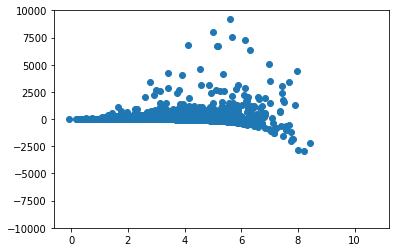

In [649]:
plt.scatter(y_pred,residuals)
plt.ylim(-10000,10000)

(0, 2500)

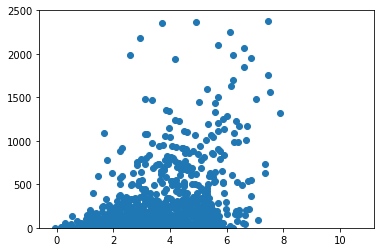

In [650]:
plt.scatter(test_set_pred_ridge,residuals)
plt.ylim(0,2500)

In [644]:
residuals

10082     61.433317
6308      43.263430
12185      7.877115
11442    184.603794
201       13.676543
            ...    
13416     57.132903
3563      -0.806254
13801     -0.565999
1993       5.454524
12834     -1.265824
Name: n_claps, Length: 2741, dtype: float64